In [1]:
#Librerias para la visualizacion y analisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustes generales para graficas
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [49]:
from ftfy import fix_text
df_cdmx = pd.read_csv("C:/Users/anali/ALANDATA/testanalisis/AnalisisTransporte/data/afluenciastc_simple_08_2025.csv", encoding="ISO-8859-1")
# Corregir nombres de estaciones mal codificados
df_cdmx["estacion"] = df_cdmx["estacion"].apply(fix_text).str.upper()

df_cdmx.head(), df_cdmx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115790 entries, 0 to 1115789
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   fecha      1115790 non-null  object
 1   anio       1115790 non-null  int64 
 2   mes        1115790 non-null  object
 3   linea      1115790 non-null  object
 4   estacion   1115790 non-null  object
 5   afluencia  1115790 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 51.1+ MB


(        fecha  anio    mes    linea            estacion  afluencia
 0  2010-01-01  2010  Enero  Linea 1            ZARAGOZA      20227
 1  2010-01-01  2010  Enero  Linea 1  ISABEL LA CATÓLICA       6487
 2  2010-01-01  2010  Enero  Linea 1           MOCTEZUMA      10304
 3  2010-01-01  2010  Enero  Linea 1         PINO SUÁREZ       8679
 4  2010-01-01  2010  Enero  Linea 1        GÓMEZ FARÍAS      19499,
 None)

In [11]:
#Normalizacion de caracteres para evitar acentos
import unicodedata

def limpiar_texto(texto):
    if isinstance(texto, str):
        # Normaliza el texto eliminando caracteres mal codificados
        texto_limpio = unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('utf-8')
        return texto_limpio
    return texto

# Aplicar a la columna 'estacion'
df_cdmx['estacion_limpia'] = df_cdmx['estacion'].apply(limpiar_texto)

# Ver las primeras estaciones
df_cdmx[['estacion', 'estacion_limpia']].drop_duplicates().head(10)

,estacion,estacion_limpia
0,Zaragoza,Zaragoza
1,Isabel la CatÃÂ³lica,Isabel la CatAA3lica
2,Moctezuma,Moctezuma
3,Pino SuÃÂ¡rez,Pino SuAArez
4,GÃÂ³mez FarÃÂ­as,GAA3mez FarAAas
5,Deportivo 18 de Marzo,Deportivo 18 de Marzo
6,La Villa/BasÃÂ­lica,La Villa/BasAAlica
7,PantitlÃÂ¡n,PantitlAAn
8,Aculco,Aculco
9,VelÃÂ³dromo,VelAA3dromo


In [13]:
# Reparacion de texto corrupto
!pip install ftfy

In [15]:
from ftfy import fix_text

# Aplica fix_text a la columna 'estacion'
df_cdmx['estacion_limpia'] = df_cdmx['estacion'].apply(fix_text)

# Ver resultados
df_cdmx[['estacion', 'estacion_limpia']].drop_duplicates().head(10)

,estacion,estacion_limpia
0,Zaragoza,Zaragoza
1,Isabel la CatÃÂ³lica,Isabel la Católica
2,Moctezuma,Moctezuma
3,Pino SuÃÂ¡rez,Pino Suárez
4,GÃÂ³mez FarÃÂ­as,Gómez Farías
5,Deportivo 18 de Marzo,Deportivo 18 de Marzo
6,La Villa/BasÃÂ­lica,La Villa/Basílica
7,PantitlÃÂ¡n,Pantitlán
8,Aculco,Aculco
9,VelÃÂ³dromo,Velódromo


In [17]:
# Conversion de la columna fecha a tipo datetime
df_cdmx["fecha"] = pd.to_datetime(df_cdmx["fecha"])

# Nombre del día (lunes, martes...)
df_cdmx["dia_semana"] = df_cdmx["fecha"].dt.day_name()

# Indicador booleano para fines de semana
df_cdmx["es_fin_semana"] = df_cdmx["dia_semana"].isin(["Saturday", "Sunday"])


In [23]:
#Carga de dataframe de NYC
df_nyc = pd.read_csv("C:/Users/anali/ALANDATA/testanalisis/AnalisisTransporte/data/MTA_Subway_Turnstile_Usage_Data__2021.csv")
df_nyc.head(), df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10897295 entries, 0 to 10897294
Data columns (total 11 columns):
 #   Column                                                      Dtype 
---  ------                                                      ----- 
 0   C/A                                                         object
 1   Unit                                                        object
 2   SCP                                                         object
 3   Station                                                     object
 4   Line Name                                                   object
 5   Division                                                    object
 6   Date                                                        object
 7   Time                                                        object
 8   Description                                                 object
 9   Entries                                                     int64 
 10  Exits           

(    C/A  Unit       SCP Station Line Name Division        Date      Time  \
 0  R196  R306  00-00-01  238 ST         1      IRT  01/23/2021  00:00:00   
 1  R196  R306  00-00-01  238 ST         1      IRT  01/23/2021  04:00:00   
 2  R196  R306  00-00-01  238 ST         1      IRT  01/23/2021  08:00:00   
 3  R196  R306  00-00-01  238 ST         1      IRT  01/23/2021  12:00:00   
 4  R196  R306  00-00-01  238 ST         1      IRT  01/23/2021  16:00:00   
 
   Description  Entries  \
 0     REGULAR  8807397   
 1     REGULAR  8807397   
 2     REGULAR  8807397   
 3     REGULAR  8807397   
 4     REGULAR  8807397   
 
    Exits                                                       
 0                                             415738           
 1                                             415739           
 2                                             415740           
 3                                             415740           
 4                                             

In [45]:
# Convertir fecha y hora
df_nyc["datetime"] = pd.to_datetime(df_nyc["Date"] + " " + df_nyc["Time"], errors='coerce')

print("Filas con datetime no convertible:")
print(df_nyc[df_nyc["datetime"].isna()][["Date", "Time"]])

# Eliminar filas con datetime NaT si las hay
df_nyc = df_nyc.dropna(subset=["datetime"])


# Extraer año
df_nyc["year"] = df_nyc["datetime"].dt.year

# Filtrar solo 2021
df_nyc_2021 = df_nyc[df_nyc["year"] == 2021].copy()

Filas con datetime no convertible:
Empty DataFrame
Columns: [Date, Time]
Index: []


In [39]:
#Limpieza de espacios
df_nyc["Time"] = df_nyc["Time"].str.strip()
df_nyc["datetime"] = pd.to_datetime(df_nyc["Date"] + " " + df_nyc["Time"], errors='coerce')
print("Filas con datetime no convertible:")
print(df_nyc[df_nyc["datetime"].isna()][["Date", "Time"]])

df_nyc = df_nyc.dropna(subset=["datetime"])

Filas con datetime no convertible:
Empty DataFrame
Columns: [Date, Time]
Index: []


In [41]:
# Ordenar por estación y datetime para cálculo posterior
df_nyc_2021.sort_values(["C/A", "Unit", "SCP", "Station", "datetime"], inplace=True)

# Calcular diferencias en 'Entries' para obtener entradas reales por intervalo
df_nyc_2021["entries_diff"] = df_nyc_2021.groupby(["C/A", "Unit", "SCP", "Station"])["Entries"].diff()

# Limpiar valores negativos o inconsistentes
df_nyc_2021["entries_diff"] = df_nyc_2021["entries_diff"].clip(lower=0, upper=10000)

# Mostrar un resumen para verificar
df_nyc_2021.head()

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,datetime,year,entries_diff
6039775,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,03:00:00,REGULAR,7511653,2558871,2021-01-02 03:00:00,2021,NaN
6039776,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,07:00:00,REGULAR,7511655,2558877,2021-01-02 07:00:00,2021,2.0
6039777,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,11:00:00,REGULAR,7511677,2558930,2021-01-02 11:00:00,2021,22.0
6039778,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,15:00:00,REGULAR,7511766,2558968,2021-01-02 15:00:00,2021,89.0
6039779,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,19:00:00,REGULAR,7511912,2558999,2021-01-02 19:00:00,2021,146.0


In [43]:
# NYC
# Hora pico mañana: 6:00 AM a 10:00 AM

# Hora pico tarde: 4:00 PM a 8:00 PM

# No pico: resto del día

def classify_peak(hour):
    if 6 <= hour < 10:
        return "peak_morning"
    elif 16 <= hour < 20:
        return "peak_evening"
    else:
        return "off_peak"

df_nyc_2021["hour"] = df_nyc_2021["datetime"].dt.hour
df_nyc_2021["peak_period"] = df_nyc_2021["hour"].apply(classify_peak)

# Agrupar por estación y periodo de hora
agg_nyc = (
    df_nyc_2021.groupby(["Station", "peak_period"])["entries_diff"]
    .sum()
    .reset_index()
    .rename(columns={"entries_diff": "total_entries"})
)

# Ver primeras filas
agg_nyc.head()

,Station,peak_period,total_entries
0,1 AV,off_peak,1783363.0
1,1 AV,peak_evening,741763.0
2,1 AV,peak_morning,124171.0
3,103 ST,off_peak,2097913.0
4,103 ST,peak_evening,1136452.0


In [107]:
# Conversion de fecha
df_cdmx['fecha'] = pd.to_datetime(df_cdmx['fecha'])

# Filtrar CDMX solo para 2021
df_cdmx_2021 = df_cdmx[df_cdmx['fecha'].dt.year == 2021]

In [131]:
# Verificar si hay datos de 2021 únicamente
df_cdmx_2021.loc[:,'year'] = pd.to_datetime(df_cdmx_2021['fecha']).dt.year
print(df_cdmx_2021.loc[:,'year'].value_counts().sort_index())

year
2021    71175
Name: count, dtype: int64


In [133]:
# Suposiciones: 
# 60% del flujo diario ocurre en hora pico (mañana y tarde).
# Resto (40%) en horas normales

# Convertir nombres de estaciones a mayúsculas para estandarizar 
df_cdmx_2021.loc[:,"estacion"] = df_cdmx_2021["estacion"].str.upper()

# Estimar afluencia por periodo
# Nota: En el caso de CDMX, los porcentajes de flujo por periodo (30% mañana, 30% tarde, 40% fuera de pico) 
# se asumieron de forma práctica para propósitos de estimación, ya que los datos originales solo están disponibles como flujo diario.

df_cdmx_2021.loc[:,"peak_morning"] = df_cdmx_2021["afluencia"] * 0.3
df_cdmx_2021.loc[:,"peak_evening"] = df_cdmx_2021["afluencia"] * 0.3
df_cdmx_2021.loc[:,"off_peak"] = df_cdmx_2021["afluencia"] * 0.4

# Agrupar por estación y sumar entradas del año
agg_cdmx_2021 = df_cdmx_2021.groupby("estacion")[["peak_morning", "peak_evening", "off_peak"]].sum().reset_index()

# Reorganizar para tener una estructura similar a la de NYC
agg_cdmx_melted = agg_cdmx_2021.melt(
    id_vars="estacion", 
    value_vars=["peak_morning", "peak_evening", "off_peak"],
    var_name="peak_period", 
    value_name="total_entries"
)

# Normalizar nombre de columna
agg_cdmx_melted.rename(columns={"estacion": "Station"}, inplace=True)

# Ver primeras filas
agg_cdmx_melted.head()

,Station,peak_period,total_entries
0,ACATITLA,peak_morning,1092207.3
1,ACULCO,peak_morning,695065.2
2,AGRÍCOLA ORIENTAL,peak_morning,830430.3
3,ALLENDE,peak_morning,1275057.6
4,APATLACO,peak_morning,1102896.9


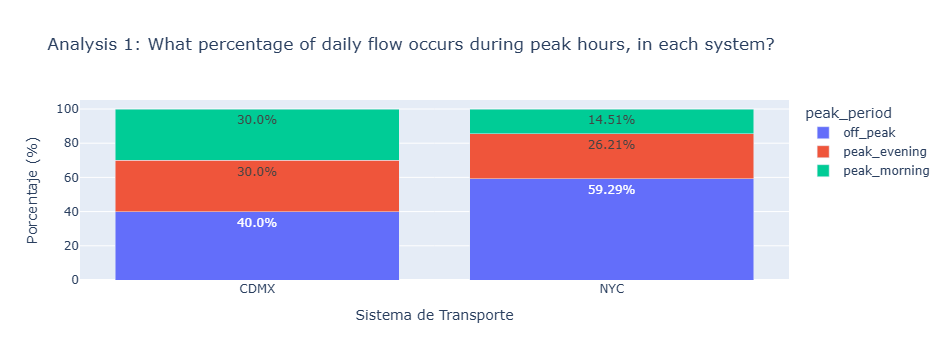

In [127]:
import plotly.express as px

# CDMX ya actualizado arriba

# NYC: agrupación por periodo
nyc_totals = agg_nyc.groupby("peak_period")["total_entries"].sum().reset_index()
nyc_totals["system"] = "NYC"

# CDMX: agrupación por periodo
cdmx_totals = agg_cdmx_melted.groupby("peak_period")["total_entries"].sum().reset_index()
cdmx_totals["system"] = "CDMX"

# Combinar
combined_totals = pd.concat([cdmx_totals, nyc_totals], ignore_index=True)

# Convertir a porcentaje
combined_totals["percent"] = combined_totals.groupby("system")["total_entries"].transform(lambda x: x / x.sum() * 100)

# Graficar
fig = px.bar(
    combined_totals,
    x="system",
    y="percent",
    color="peak_period",
    text=combined_totals["percent"].round(2).astype(str) + '%',
    barmode="stack",
    title="Analysis 1: What percentage of daily flow occurs during peak hours, in each system?",
    labels={"percent": "Porcentaje de entradas", "system": "Sistema"}
)

fig.update_layout(yaxis_title="Porcentaje (%)", xaxis_title="Sistema de Transporte")
fig.show()

In [135]:
#Verificar qué valores hay realmente en la columna peak_period de agg_nyc:
agg_nyc["peak_period"].unique()

array(['off_peak', 'peak_evening', 'peak_morning'], dtype=object)

In [137]:
#Verifica el resumen de agg_nyc_wide
agg_nyc_wide = agg_nyc.pivot_table(
    index="Station",
    values="total_entries",
    columns="peak_period",
    aggfunc="sum"
).fillna(0)

agg_nyc_wide["total_peak"] = agg_nyc_wide["peak_morning"] + agg_nyc_wide["peak_evening"]

top_nyc = agg_nyc_wide.sort_values("total_peak", ascending=False).head(10).reset_index()
top_nyc["system"] = "NYC"

In [139]:
top_nyc

peak_period,Station,off_peak,peak_evening,peak_morning,total_peak,system
0,34 ST-PENN STA,9545812.0,3478735.0,1756983.0,5235718.0,NYC
1,86 ST,6387961.0,3174294.0,919321.0,4093615.0,NYC
2,125 ST,5563221.0,2614980.0,1145109.0,3760089.0,NYC
3,34 ST-HERALD SQ,7335670.0,3194742.0,524964.0,3719706.0,NYC
4,GRD CNTRL-42 ST,6752579.0,2870683.0,797617.0,3668300.0,NYC
5,23 ST,6258387.0,3175671.0,472234.0,3647905.0,NYC
6,14 ST-UNION SQ,6057611.0,3011946.0,494272.0,3506218.0,NYC
7,FULTON ST,4716069.0,2618848.0,752204.0,3371052.0,NYC
8,42 ST-PORT AUTH,5646879.0,1904255.0,1384029.0,3288284.0,NYC
9,96 ST,4398540.0,2323120.0,810579.0,3133699.0,NYC


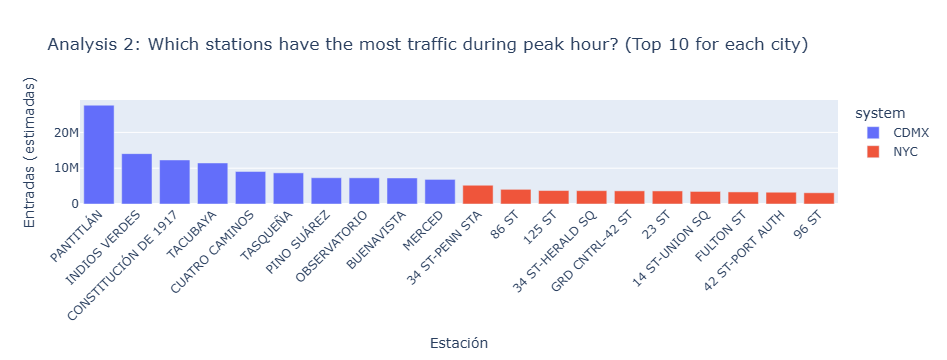

In [173]:
# --- CDMX: Top estaciones por hora pico total ---
agg_cdmx_wide = agg_cdmx.pivot_table(index="estacion", values=["peak_morning", "peak_evening"], aggfunc="sum")
agg_cdmx_wide["total_peak"] = agg_cdmx_wide["peak_morning"] + agg_cdmx_wide["peak_evening"]

# Renombrar 'estacion' a 'Station' para unir luego
agg_cdmx_wide = agg_cdmx_wide.reset_index().rename(columns={"estacion": "Station"})

# Top 10 estaciones
top_cdmx = agg_cdmx_wide.sort_values("total_peak", ascending=False).head(10)
top_cdmx["system"] = "CDMX"

# --- Unir ambos ---
top_combined = pd.concat([
    top_cdmx[["Station", "total_peak", "system"]],
    top_nyc[["Station", "total_peak", "system"]]
])

# --- Gráfico de barras ---
fig2 = px.bar(
    top_combined,
    x="Station",
    y="total_peak",
    color="system",
    title="Analysis 2: Which stations have the most traffic during peak hour? (Top 10 for each city)",
    labels={"total_peak": "Total de entradas en horas pico"},
)

fig2.update_layout(
    xaxis_title="Estación",
    yaxis_title="Entradas (estimadas)",
    xaxis_tickangle=-45
)

fig2.show()

In [145]:
# Top estaciones CDMX (ya tienes agg_cdmx_wide con peak_morning y peak_evening)
agg_cdmx_wide["total_peak"] = agg_cdmx_wide["peak_morning"] + agg_cdmx_wide["peak_evening"]
top_cdmx_stations = agg_cdmx_wide.sort_values("total_peak", ascending=False).head(10)

print("Top 10 estaciones CDMX por afluencia en hora pico:")
print(top_cdmx_stations[["Station", "peak_morning", "peak_evening", "total_peak"]])

# Para NYC (si tienes agg_nyc con peak_period, total_entries)
agg_nyc_wide = agg_nyc.pivot_table(index="Station", 
                                  columns="peak_period", 
                                  values="total_entries", 
                                  aggfunc="sum").fillna(0)
agg_nyc_wide["total_peak"] = agg_nyc_wide.get("peak_morning", 0) + agg_nyc_wide.get("peak_evening", 0)
top_nyc_stations = agg_nyc_wide.sort_values("total_peak", ascending=False).head(10)

print("\nTop 10 estaciones NYC por afluencia en hora pico:")
print(top_nyc_stations[["peak_morning", "peak_evening", "total_peak"]])

Top 10 estaciones CDMX por afluencia en hora pico:
                  Station  peak_morning  peak_evening  total_peak
106             PANTITLÁN    13797978.0    13797978.0  27595956.0
65          INDIOS VERDES     7034932.8     7034932.8  14069865.6
31   CONSTITUCIÓN DE 1917     6150092.7     6150092.7  12300185.4
137              TACUBAYA     5728350.0     5728350.0  11456700.0
37         CUATRO CAMINOS     4546844.7     4546844.7   9093689.4
139              TASQUEÑA     4345871.7     4345871.7   8691743.4
111           PINO SUÁREZ     3665030.7     3665030.7   7330061.4
101          OBSERVATORIO     3653622.3     3653622.3   7307244.6
17             BUENAVISTA     3634323.0     3634323.0   7268646.0
85                 MERCED     3434761.8     3434761.8   6869523.6

Top 10 estaciones NYC por afluencia en hora pico:
peak_period      peak_morning  peak_evening  total_peak
Station                                                
34 ST-PENN STA      1756983.0     3478735.0   5235718.0
86 S

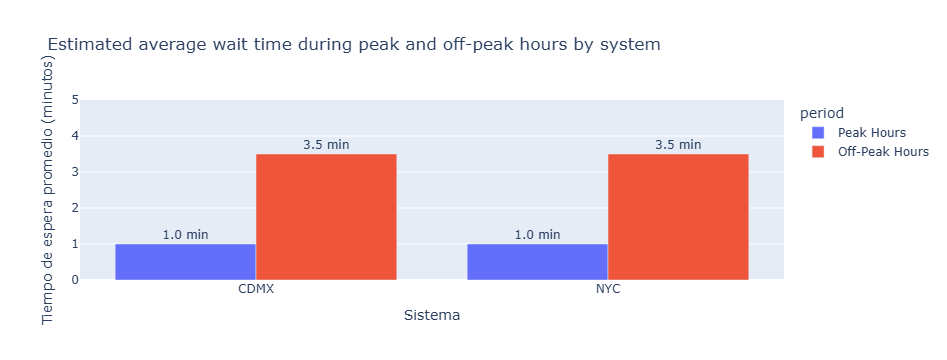

In [147]:
# Supuestos tiempos de espera (minutos)
wait_times = {
    "peak": 1,        # Promedio 1 min en peak
    "off_peak": 3.5   # Promedio 3.5 min en off-peak
}

# Porcentajes de afluencia para CDMX y NYC
affluence_percent = {
    "CDMX": {"peak_morning": 30, "peak_evening": 30, "off_peak": 40},
    "NYC": {"peak_morning": 14.51, "peak_evening": 26.21, "off_peak": 59.29}
}

# Calcular tiempos ponderados por sistema y periodo
data = []
for system, periods in affluence_percent.items():
    peak_total_percent = periods["peak_morning"] + periods["peak_evening"]
    off_peak_percent = periods["off_peak"]

    # Tiempo ponderado en peak y off-peak
    peak_wait = wait_times["peak"]
    off_peak_wait = wait_times["off_peak"]

    data.append({
        "system": system,
        "period": "Peak Hours",
        "avg_wait_time_min": peak_wait,
        "affluence_percent": peak_total_percent
    })
    data.append({
        "system": system,
        "period": "Off-Peak Hours",
        "avg_wait_time_min": off_peak_wait,
        "affluence_percent": off_peak_percent
    })

df_wait = pd.DataFrame(data)

# Graficar tiempo de espera estimado vs afluencia para cada sistema y periodo
fig3 = px.bar(
    df_wait,
    x="system",
    y="avg_wait_time_min",
    color="period",
    barmode="group",
    text="avg_wait_time_min",
    labels={"avg_wait_time_min": "Tiempo de espera promedio (minutos)", "system": "Sistema"},
    title="Estimated average wait time during peak and off-peak hours by system"
)

fig3.update_traces(texttemplate="%{text:.1f} min", textposition="outside")
fig3.update_layout(yaxis_range=[0, 5], yaxis_title="Tiempo de espera promedio (minutos)")
fig3.show()

In [163]:
df_nyc['datetime'] = pd.to_datetime(df_nyc['datetime'])
df_nyc = df_nyc.sort_values(['Station', 'datetime'])

# Diferencia horaria de entradas por estación
df_nyc['entries_diff'] = df_nyc.groupby('Station')['Entries'].diff()

# Limpiar: eliminar o ajustar valores negativos (que no deberían pasar si los datos son acumulados)
df_nyc['entries_diff'] = df_nyc['entries_diff'].clip(lower=0).fillna(0)

print(df_nyc[['datetime', 'Station', 'Entries', 'entries_diff']].head(10))

                   datetime Station    Entries  entries_diff
6044430 2021-01-02 03:00:00    1 AV   15512620           0.0
6044436 2021-01-02 03:00:00    1 AV   61216301    45703681.0
6044442 2021-01-02 03:00:00    1 AV  370876227   309659926.0
6044448 2021-01-02 03:00:00    1 AV    2614082           0.0
6044454 2021-01-02 03:00:00    1 AV    6655790     4041708.0
6044460 2021-01-02 03:00:00    1 AV     181842           0.0
6044466 2021-01-02 03:00:00    1 AV     133070           0.0
6044472 2021-01-02 03:00:00    1 AV      89717           0.0
6044478 2021-01-02 03:00:00    1 AV      68422           0.0
6044484 2021-01-02 03:00:00    1 AV      79897       11475.0


In [171]:
# Clasificar por periodos de hora pico y off-peak
def classify_peak(hour):
    if 6 <= hour < 10:
        return "peak_morning"
    elif 16 <= hour < 20:
        return "peak_evening"
    else:
        return "off_peak"

df_nyc['hour'] = df_nyc['datetime'].dt.hour
df_nyc['peak_period'] = df_nyc['hour'].apply(classify_peak)

# Agrupar por estación y periodo para sumar entradas estimadas (diferencias)
agg_nyc = df_nyc.groupby(['Station', 'peak_period'])['entries_diff'].sum().reset_index()

# Ver diferencias en flujo entre periodos
print(agg_nyc.head())

  Station   peak_period  entries_diff
0    1 AV      off_peak  7.413035e+11
1    1 AV  peak_evening  1.854608e+11
2    1 AV  peak_morning  1.874320e+11
3  103 ST      off_peak  8.541177e+10
4  103 ST  peak_evening  2.143756e+10
